<a href="https://colab.research.google.com/github/FaisalAhmed0/machine_learning_from_scratch/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN
This notebook contains an implementaion of K-nearest neighbor algorithm using numpy.

# Imports, setup, and functions defenitions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import datasets

# set the default figure size
from IPython.core.pylabtools import figsize
figsize(14, 7)

In [6]:
# fix the random seed
seed = 1004
np.random.seed(seed)

In [13]:
def generate_syntheatic_data(size, n_classes=2, plot=True):
  '''
  A function to geenrate syntheatic data to test the learning algorithm.
  size: number of samples
  '''
  redish = '#d73027'
  orangeish = '#fc8d59'
  blueish = '#4575b4'
  colormap = np.array([redish,blueish,orangeish])
  X, Y = datasets.make_classification(size, 2, 2, 0, n_classes=n_classes ,random_state=seed, n_clusters_per_class=1, class_sep=1)
  if plot:
    figure = plt.figure(figsize=(10, 5))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=colormap[Y])
  return X, Y

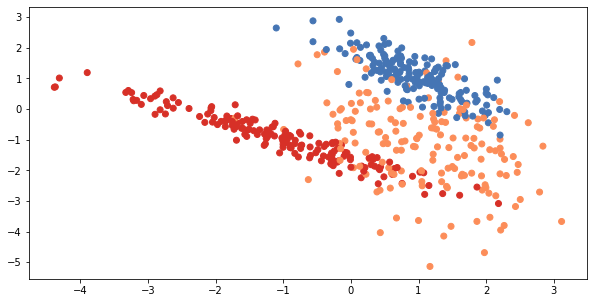

In [15]:
n_classes = 3
X, Y = generate_syntheatic_data(500, plot=True, n_classes=n_classes)

In [16]:
def split_valid(X, Y, split_ratio=0.1):
  data_size = X.shape[0]
  valid_length = int(data_size * split_ratio)
  # shuffle the data before splitting
  inds = np.random.choice(range(data_size), data_size, replace=False)
  X = X[inds]
  Y = Y[inds]

  x_valid = X[: valid_length]
  y_valid = Y[: valid_length]

  x_train = X[valid_length: ]
  y_train = Y[valid_length: ]
  return x_train, y_train, x_valid, y_valid

In [25]:
# visualize the predictions
# the code is taken from https://www.tvhahn.com/posts/beautiful-plots-decision-boundary/
def visualize(model, x, y):
  # define the mesh 
  x0 = x[:, 0]
  x1 = x[:, 1]
  PAD = 1.0
  x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
  x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

  # create the mesh points with step size H
  H = 0.1 # mesh stepsize
  x0_axis_range = np.arange(x0_min,x0_max, H)
  x1_axis_range = np.arange(x1_min,x1_max, H)

  # create the mesh-grid
  xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)
  # change the shape of the meshgrid to the same as the data input
  xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))
  preds, probs = model.predict(xx, n_classes=n_classes)

  # the size of each probability dot
  yy_size = np.max(probs, axis=1)

  PROB_DOT_SCALE = 40 # modifier to scale the probability dots
  PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
  TRUE_DOT_SIZE = 50 # size of the true labels

  # make figure
  plt.style.use('seaborn-whitegrid') # set style because it looks nice
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)  

  redish = '#d73027'
  orangeish = '#fc8d59'
  yellowish = '#fee090'
  blueish = '#4575b4'
  colormap = np.array([redish,blueish,orangeish])

  ax.scatter(xx[:,0], xx[:,1], c=colormap[preds], alpha=0.4, 
           s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)

# Model definition, training, and results visulization

In [33]:
class KNN:
  def __init__(self, k=1):
    self.k = k
  
  def fit(self, x, y):
    '''
    fitting a KNN is just to memorize the data
    '''
    self.x = x
    self.y = y

  def predict(self, x, n_classes=2):
    assert not (self.x is None and self.y is None), "No data has been passed to the fit function"
    data_size = self.x.shape[0]
    num_tests = 1 if len(x.shape) == 1 else x.shape[0]
    preds = []
    preds_probs = []
    for j in range(num_tests):
      distances = defaultdict(lambda : 0)
      for i in range(data_size):
        dis = self.distance(x[j], self.x[i])
        # print(self.y)
        distances[dis] = self.y[i]
      sorted_dis = sorted(distances)
      top_k = []
      for i in range(self.k):
        top_k.append(distances[sorted_dis[i]])
      top_k = np.array(top_k)
      classes_probs = []
      for i in range(n_classes):
        classes_probs.extend([np.sum(top_k == i) / self.k])
      preds_probs.append(classes_probs)
      pred = np.argmax(np.bincount(top_k))
      preds.append(pred)
    preds = np.array(preds)
    preds_probs = np.array(preds_probs)
    return preds, preds_probs

  def distance(self, x1, x2):
    return (np.sum((x1 - x2)**2))**0.5


  def accuracy(self, x, y, n_classes):
    preds, probs = self.predict(x, n_classes)
    return 100 * (np.sum(preds == y) / len(y))

In [34]:
model_ = KNN(1)
model.fit(X, Y)
model.accuracy(X, Y, n_classes)

100.0

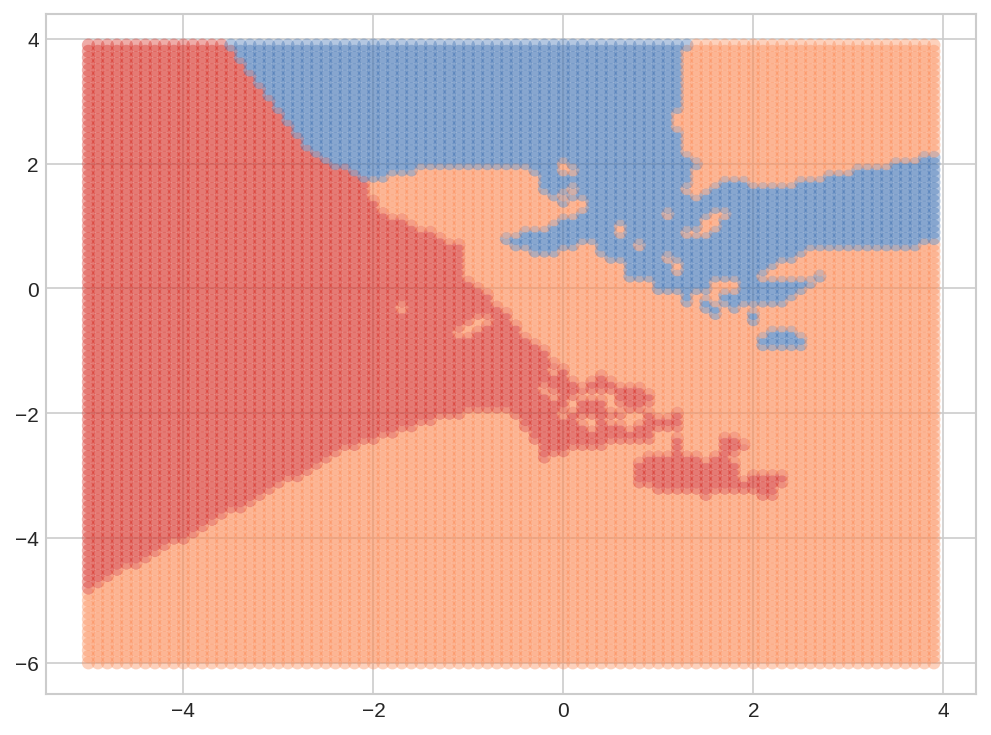

In [35]:
visualize(model, X, Y)

In [36]:
model = KNN(5)
model.fit(X, Y)
model.accuracy(X, Y, n_classes)

90.8

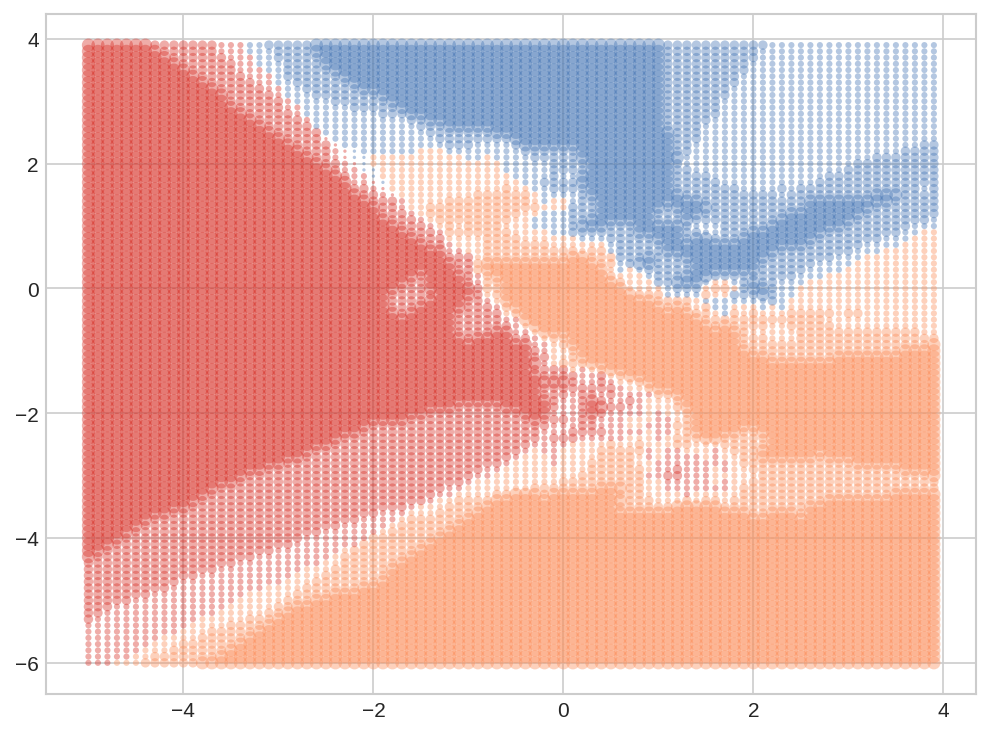

In [37]:
visualize(model, X, Y)